In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score


In [2]:
data = pd.read_csv('Marketing_Campaign_Dataset.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

#### Data Description
* ID : Unique ID of each customer
* Year_Birth : Age of the customer
* Education : Customer's level of education
* Marital_Status : Customer's marital status
* Kidhome : Number of small children in customer's household
* Teenhome : Number of teenagers in customer's household
* Income : Customer's yearly household income
* Recency : Number of days since the last purchase
* MntFishProducts : The amount spent on fish products in the last 2 years
* MntMeatProducts : The amount spent on meat products in the last 2 years
* MntFruits : The amount spent on fruits products in the last 2 years
* MntSweetProducts : Amount spent on sweet products in the last 2 years
* MntWines : The amount spent on wine products in the last 2 years
* MntGoldProds : The amount spent on gold products in the last 2 years
* NumDealsPurchases : Number of purchases made with discount
* NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases : Number of purchases made directly in stores
* NumWebPurchases : Number of purchases made through the company's website
* NumWebVisitsMonth : Number of visits to company's website in the last month
* AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
* AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
* AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
* AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
* AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
* AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain : 1 If the customer complained in the last 2 years, 0 otherwise
* Country: Country customer belongs to

In [5]:
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [6]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns {data.shape[1]}')

Number of rows: 100279
Number of columns 29


In [9]:
for i in data:
    print(i)
    print(data[i].unique(), '\n')

ID
[     1      2      3 ... 100277 100278 100279] 

Year_Birth
[1978 1974 1972 1911 1931 1929 1922 1905 1990 1927 1961 1966 1975 1959
 1942 1924 1988 1952 1968 1900 1893 1958 1964 1894 1930 1921 1981 1955
 1935 1982 1995 1944 1950 1969 1989 1939 1913 1941 1910 1909 1937 1947
 1908 1987 1933 1898 1932 1904 1928 1902 1906 1991 1976 1954 1903 1899
 1946 1960 1895 1948 1918 1963 1938 1923 1951 1914 1916 1936 1949 1896
 1912 1985 1984 1992 1917 1983 1971 1980 1962 1994 1920 1940 1915 1926
 1979 1901 1953 1977 1943 1945 1993 1897 1965 1956 1957 1986 1919 1907
 1970 1973 1925 1967 1934] 

Education
['Master' 'Graduation' 'PhD' '2n Cycle' 'Basic'] 

Marital_Status
['Single' 'Married' 'Alone' 'YOLO' 'Divorced' 'Together' 'Widow' 'Absurd'] 

Income
[491796.22 513926.78 521309.22 ... 410351.37  64094.5   96606.74] 

Kidhome
[1 2 0] 

Teenhome
[0 2 1] 

Dt_Customer
['2013-12-26' '2014-05-04' '2013-02-15' '2013-06-12' '2013-05-30'
 '2014-01-31' '2013-02-13' '2013-09-12' '2013-08-28' '2013-03-16'
 

In [10]:
data.drop(['AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Response'],axis = 1,inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [12]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome','Teenhome'],axis = 1,inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Dt_Customer          100279 non-null  object 
 6   Recency              100279 non-null  int64  
 7   MntWines             100279 non-null  int64  
 8   MntFruits            100279 non-null  int64  
 9   MntMeatProducts      100279 non-null  int64  
 10  MntFishProducts      100279 non-null  int64  
 11  MntSweetProducts     100279 non-null  int64  
 12  MntGoldProds         100279 non-null  int64  
 13  NumDealsPurchases    100279 non-null  int64  
 14  NumWebPurchases      100279 non-null  int64  
 15  NumCatalogPurchas

In [14]:
num_cols = data.select_dtypes(include = 'number').columns
cat_cols = data.select_dtypes(include = ['object','category']).columns




In [15]:
data[cat_cols].describe().T

,count,unique,top,freq
Education,100279,5,Basic,20282
Marital_Status,100279,8,Widow,12692
Dt_Customer,100279,663,2013-01-27,202


In [16]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100279.0,50140.000000,28948.198159,1.0,25070.500,50140.00,75209.50,100279.00
Year_Birth,100279.0,1944.139720,29.713721,1893.0,1918.000,1944.00,1970.00,1995.00
Income,100279.0,333467.834329,191857.770691,1735.1,167676.135,332609.99,498824.36,666664.13
Recency,100279.0,49.002802,28.531490,0.0,24.000,49.00,74.00,98.00
MntWines,100279.0,746.463477,431.644442,0.0,372.000,746.00,1119.00,1492.00
MntFruits,100279.0,99.083387,57.403252,0.0,50.000,99.00,149.00,198.00
MntMeatProducts,100279.0,862.007549,498.945468,0.0,431.000,862.00,1297.00,1724.00
MntFishProducts,100279.0,129.312987,74.862017,0.0,65.000,130.00,194.00,258.00
MntSweetProducts,100279.0,131.026656,75.990216,0.0,65.000,131.00,197.00,262.00
MntGoldProds,100279.0,181.281515,104.854665,0.0,90.000,182.00,273.00,361.00


***One hot encoding for cat cols***

In [17]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse_output=False)
marital_encoded = ohe.fit_transform(data[["Marital_Status"]])
data[ohe.get_feature_names_out()] = marital_encoded


In [18]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1,1978,Master,Single,491796.22,2013-12-26,31,1364,72,1129,...,3,11,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1974,Master,Married,513926.78,2014-05-04,23,1275,94,455,...,3,11,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1972,Graduation,Alone,521309.22,2013-02-15,93,62,127,530,...,3,11,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1911,PhD,YOLO,231628.91,2013-06-12,13,251,87,1153,...,3,11,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1931,2n Cycle,Divorced,223936.10,2013-05-30,65,670,10,650,...,3,11,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data['Age'] = 2025 - data['Year_Birth']

In [20]:
data.drop(['Marital_Status','Year_Birth'],axis = 1,inplace = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100279 non-null  int64  
 1   Education                100279 non-null  object 
 2   Income                   100279 non-null  float64
 3   Dt_Customer              100279 non-null  object 
 4   Recency                  100279 non-null  int64  
 5   MntWines                 100279 non-null  int64  
 6   MntFruits                100279 non-null  int64  
 7   MntMeatProducts          100279 non-null  int64  
 8   MntFishProducts          100279 non-null  int64  
 9   MntSweetProducts         100279 non-null  int64  
 10  MntGoldProds             100279 non-null  int64  
 11  NumDealsPurchases        100279 non-null  int64  
 12  NumWebPurchases          100279 non-null  int64  
 13  NumCatalogPurchases      100279 non-null  int64  
 14  NumS

In [22]:
num_cols1 = data.select_dtypes(include = 'number').columns

In [23]:
data[num_cols1].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100279.0,50140.000000,28948.198159,1.0,25070.500,50140.00,75209.50,100279.00
Income,100279.0,333467.834329,191857.770691,1735.1,167676.135,332609.99,498824.36,666664.13
Recency,100279.0,49.002802,28.531490,0.0,24.000,49.00,74.00,98.00
MntWines,100279.0,746.463477,431.644442,0.0,372.000,746.00,1119.00,1492.00
MntFruits,100279.0,99.083387,57.403252,0.0,50.000,99.00,149.00,198.00
MntMeatProducts,100279.0,862.007549,498.945468,0.0,431.000,862.00,1297.00,1724.00
MntFishProducts,100279.0,129.312987,74.862017,0.0,65.000,130.00,194.00,258.00
MntSweetProducts,100279.0,131.026656,75.990216,0.0,65.000,131.00,197.00,262.00
MntGoldProds,100279.0,181.281515,104.854665,0.0,90.000,182.00,273.00,361.00
NumDealsPurchases,100279.0,7.008257,4.327794,0.0,3.000,7.00,11.00,14.00


In [24]:
label = LabelEncoder()
data['Education'] = label.fit_transform(data['Education'])

In [25]:
data['Education']

0         3
1         3
2         2
3         4
4         0
         ..
100274    4
100275    2
100276    2
100277    1
100278    1
Name: Education, Length: 100279, dtype: int64

In [26]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Loyalty"] = 2025 - data["Dt_Customer"].dt.year
data.drop('Dt_Customer',axis = 1,inplace = True)

In [27]:
data.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty
0,1,3,491796.22,31,1364,72,1129,45,69,206,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,12
1,2,3,513926.78,23,1275,94,455,217,104,61,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51,11
2,3,2,521309.22,93,62,127,530,252,237,170,...,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53,12
3,4,4,231628.91,13,251,87,1153,157,241,197,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,12
4,5,0,223936.10,65,670,10,650,34,96,321,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94,12


In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes

In [29]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

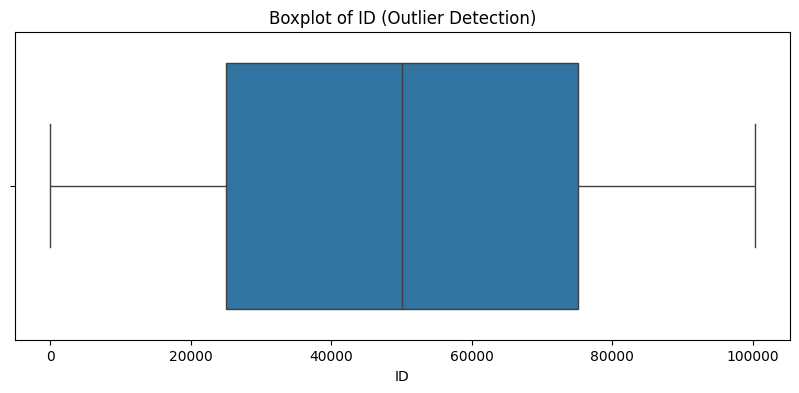

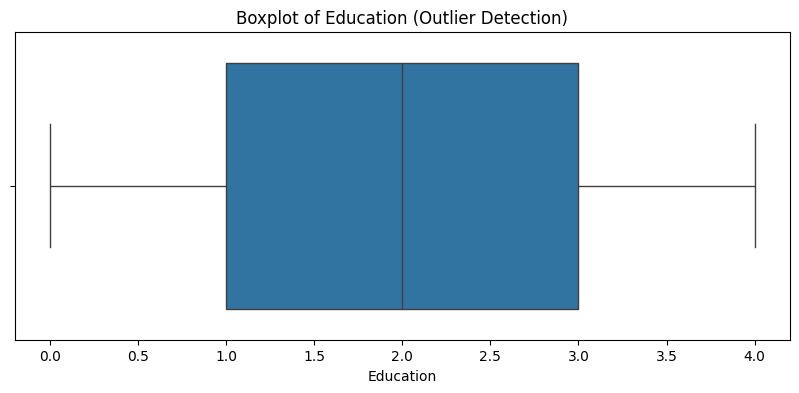

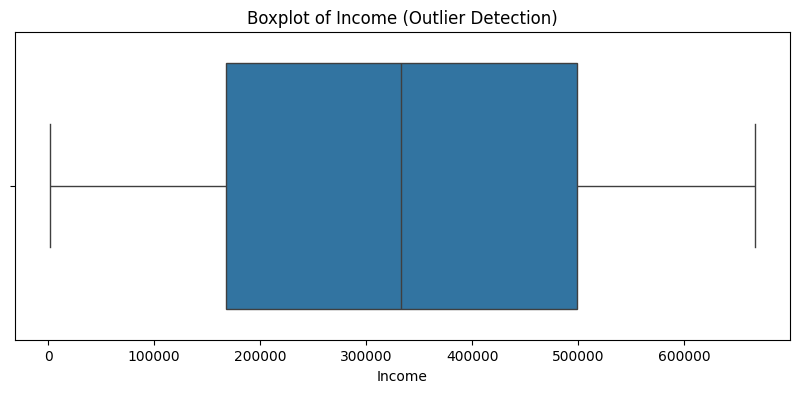

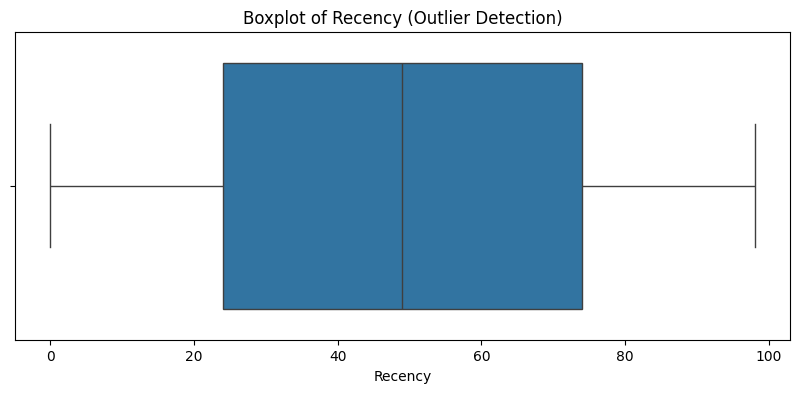

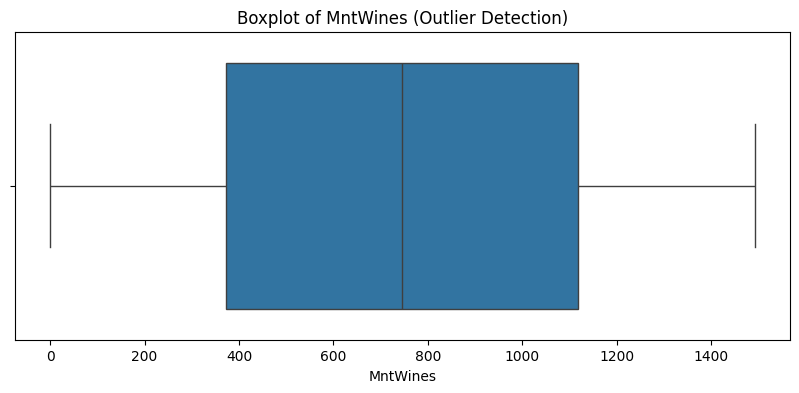

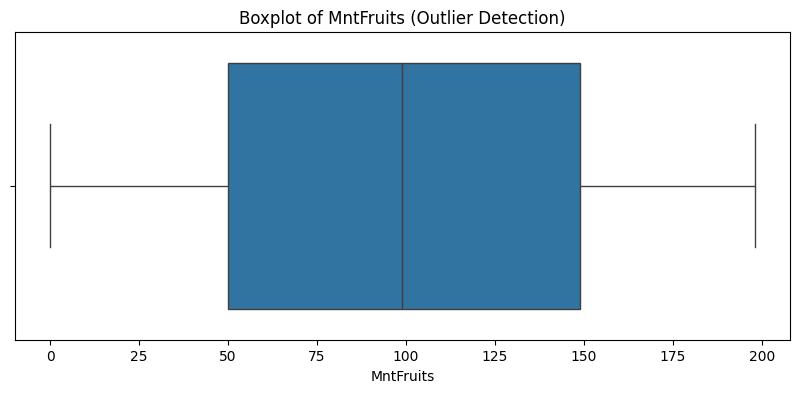

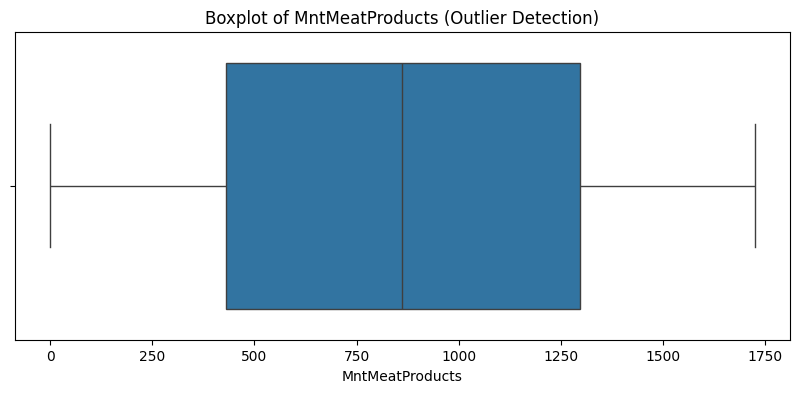

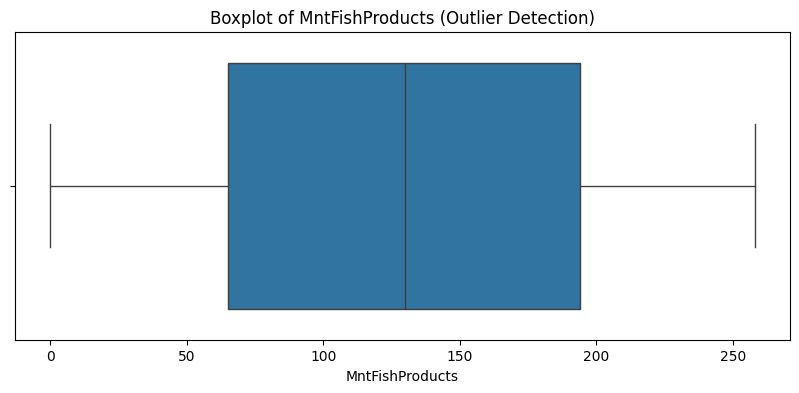

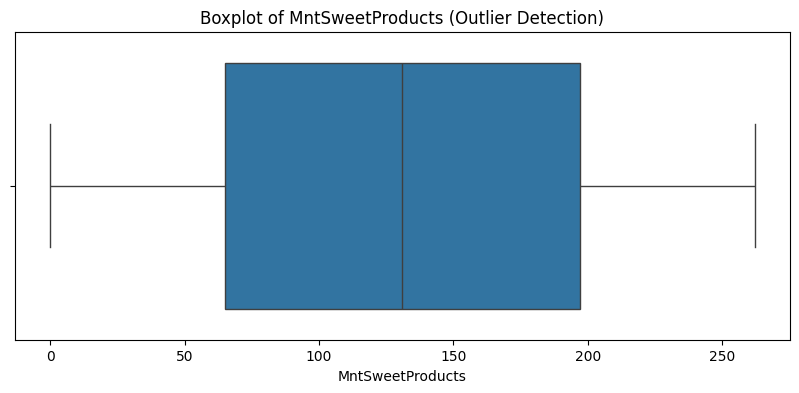

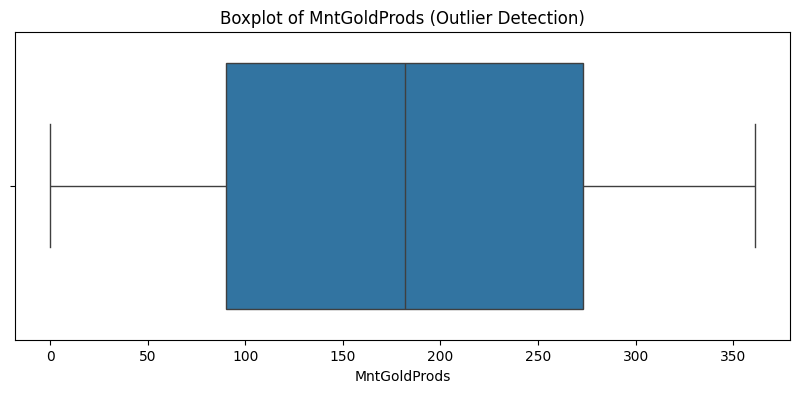

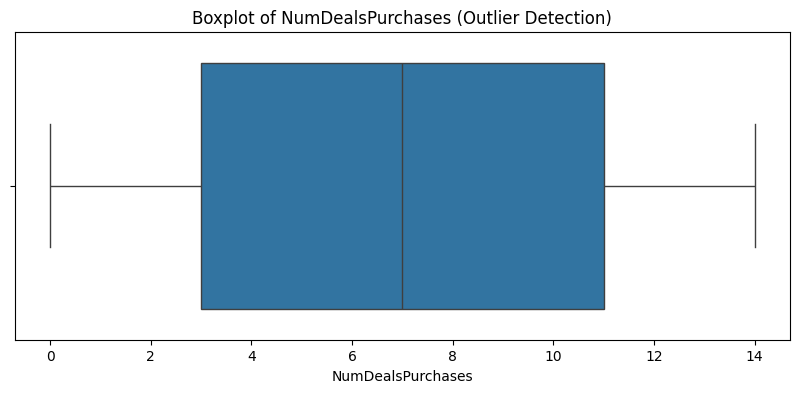

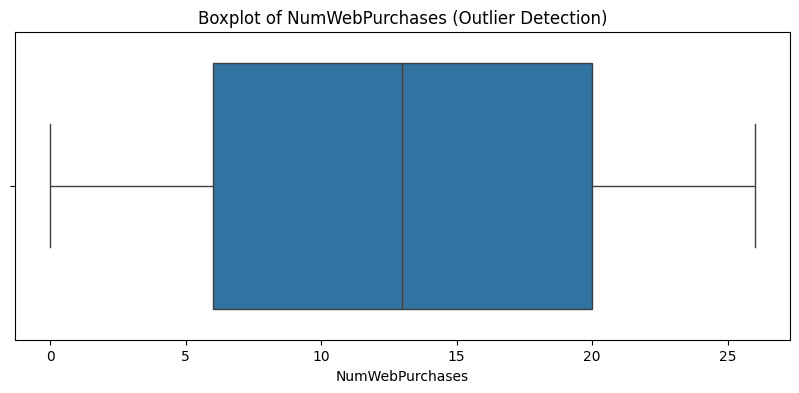

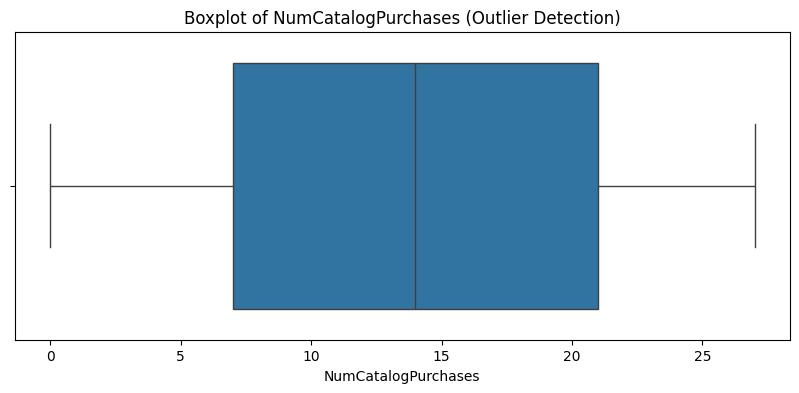

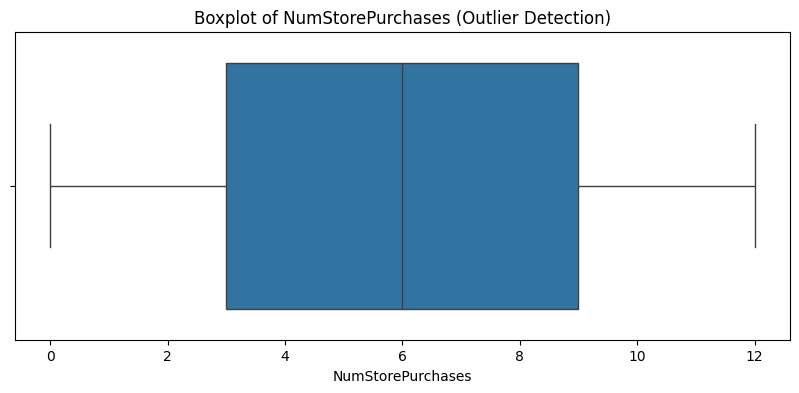

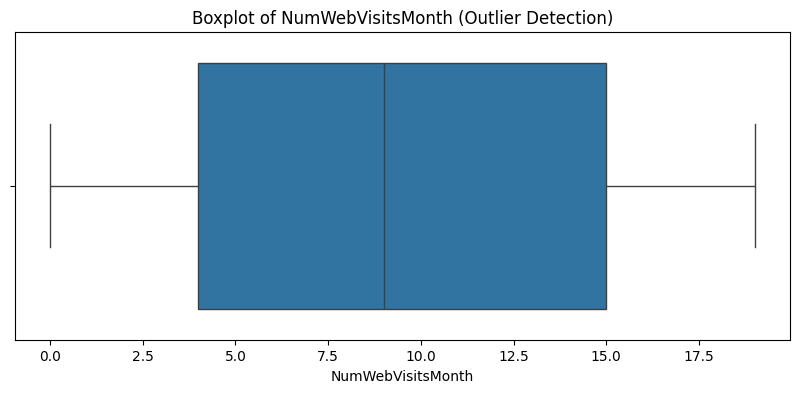

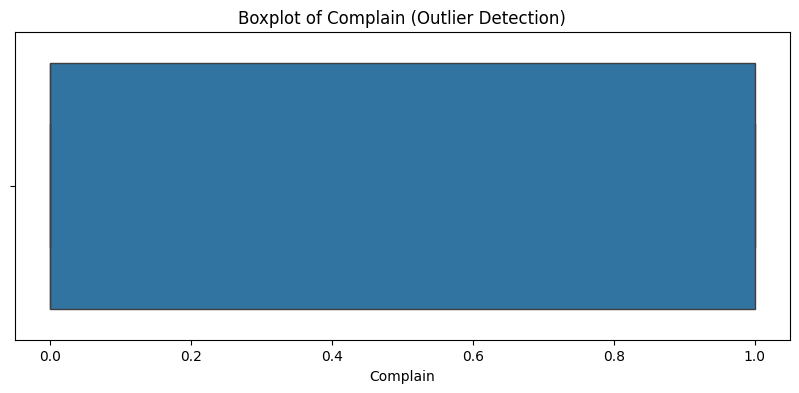

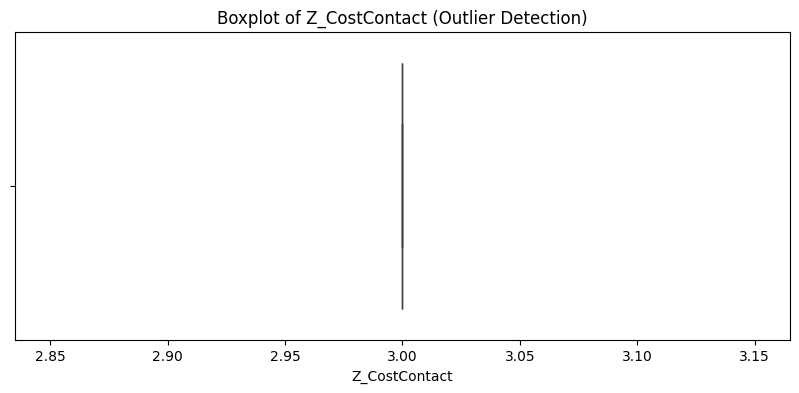

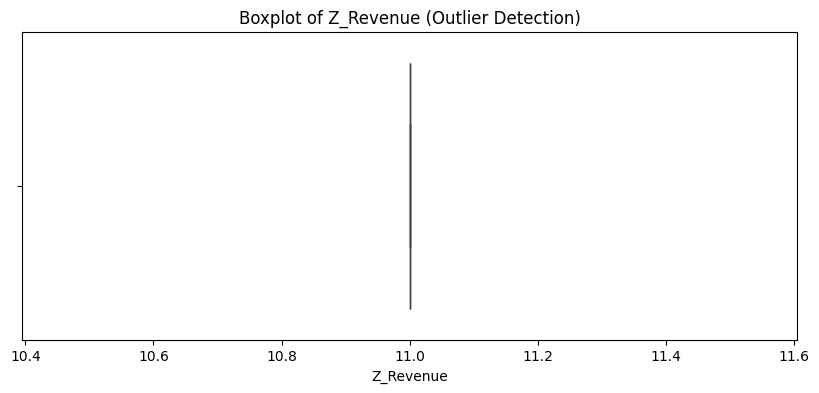

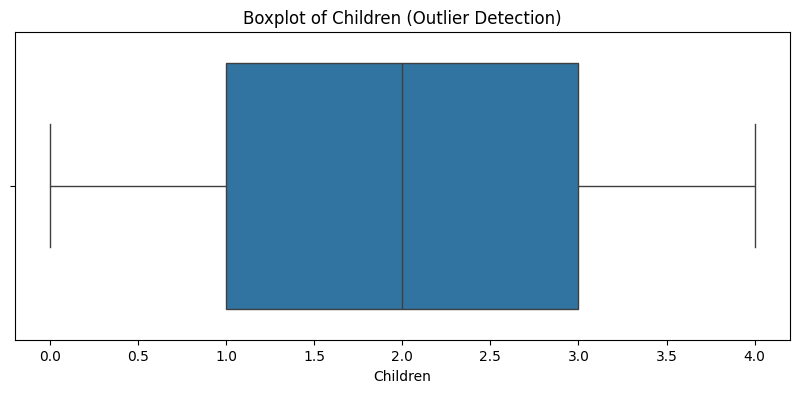

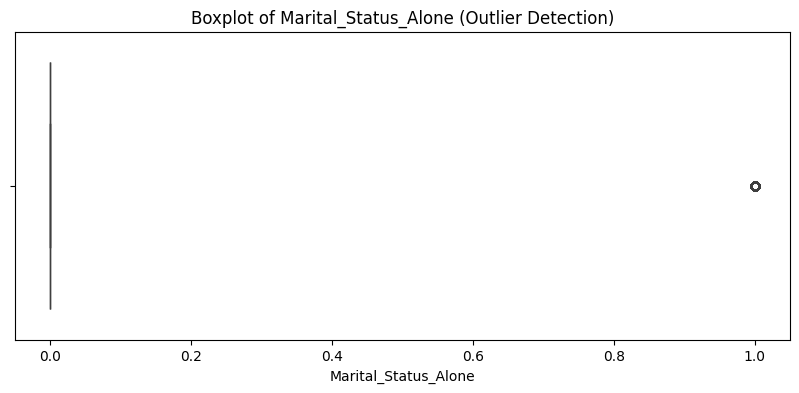

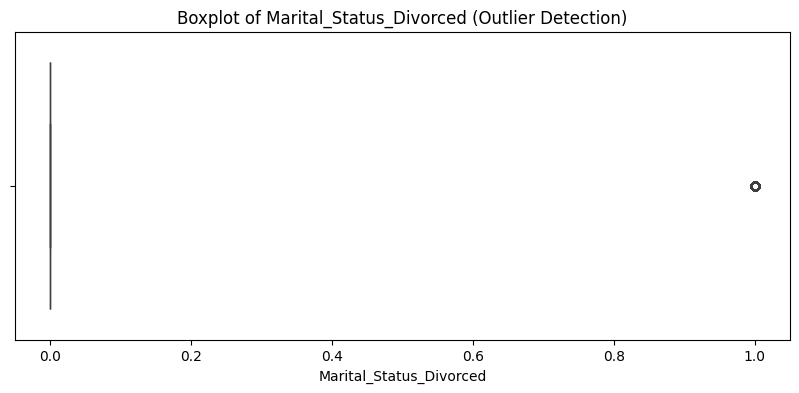

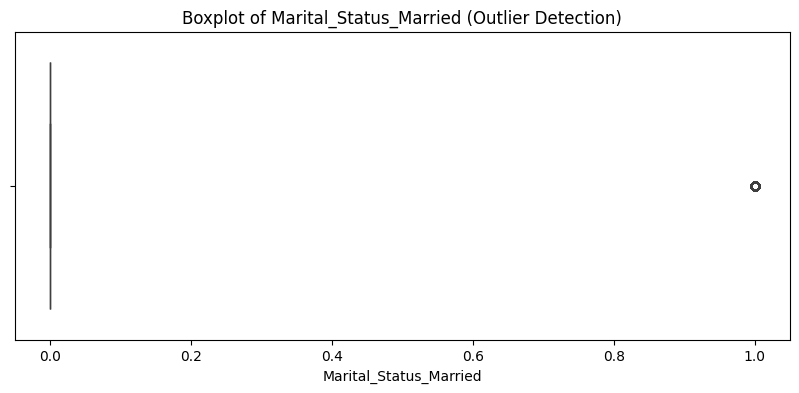

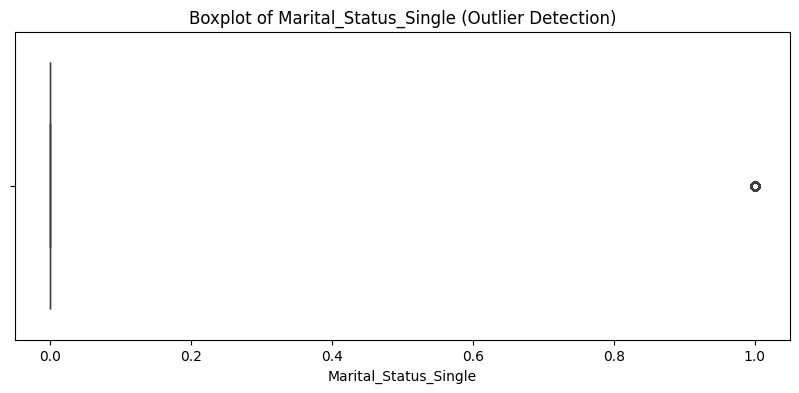

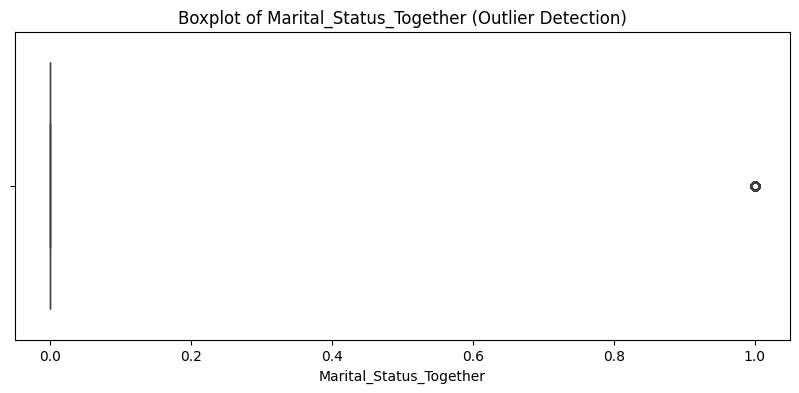

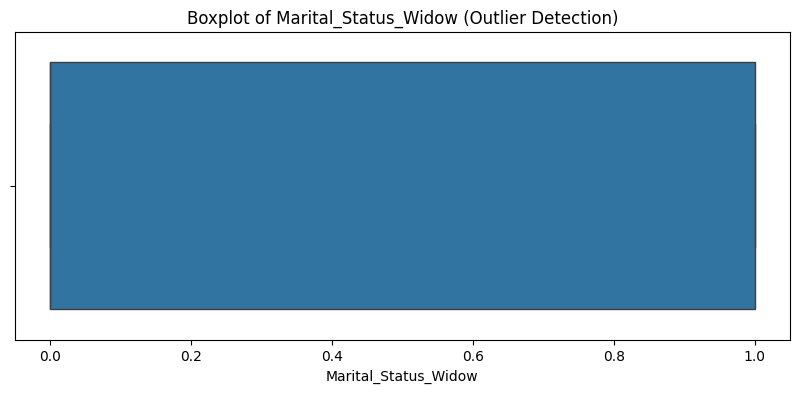

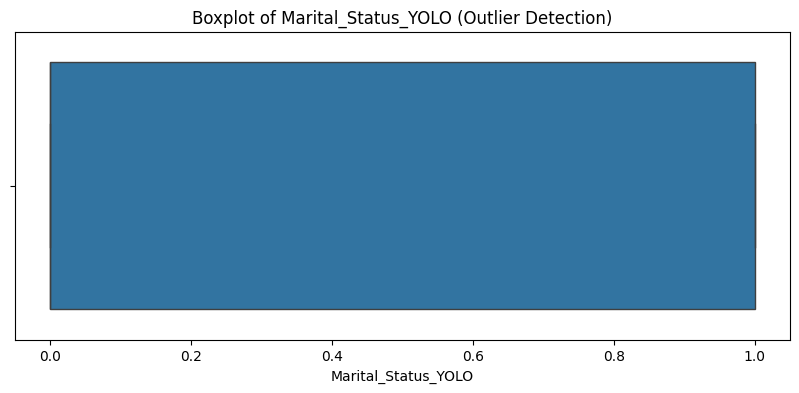

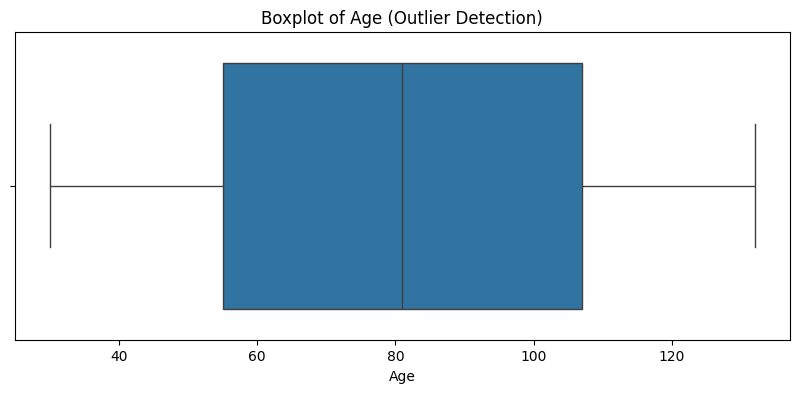

In [30]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.show()
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


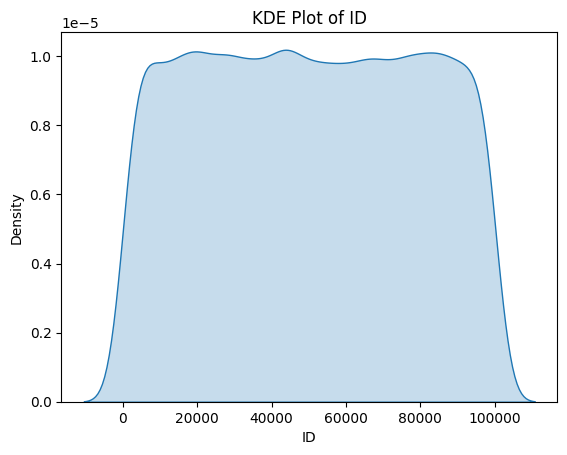

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


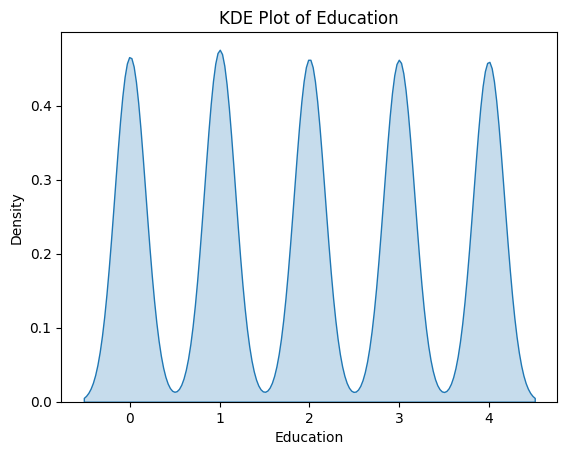

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


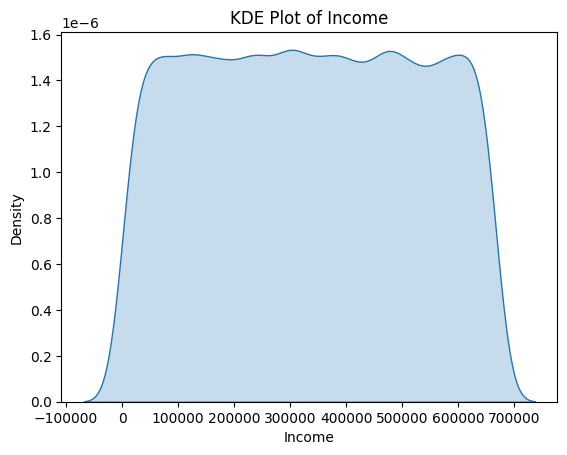

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


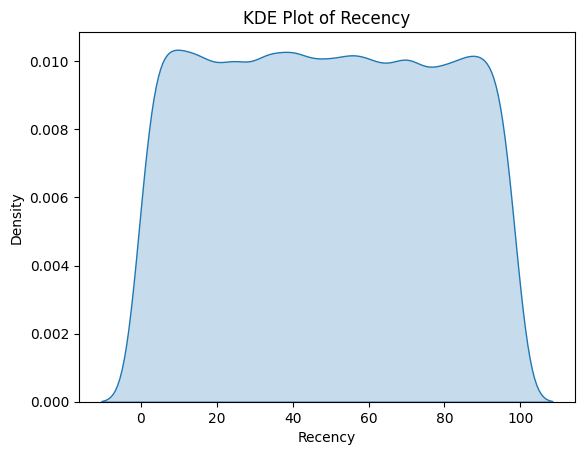

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


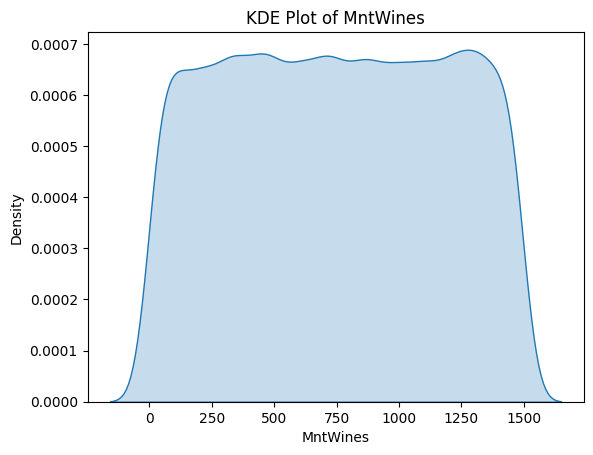

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


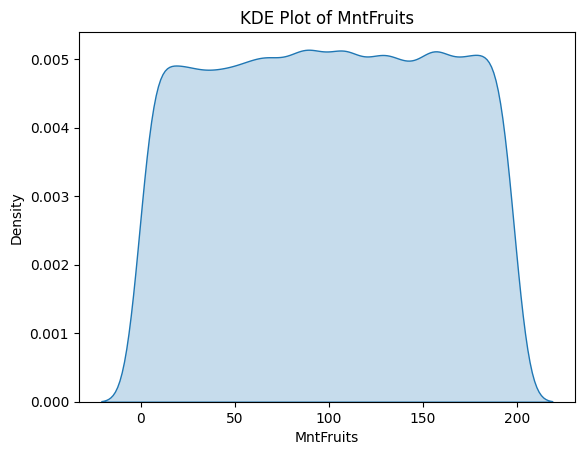

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


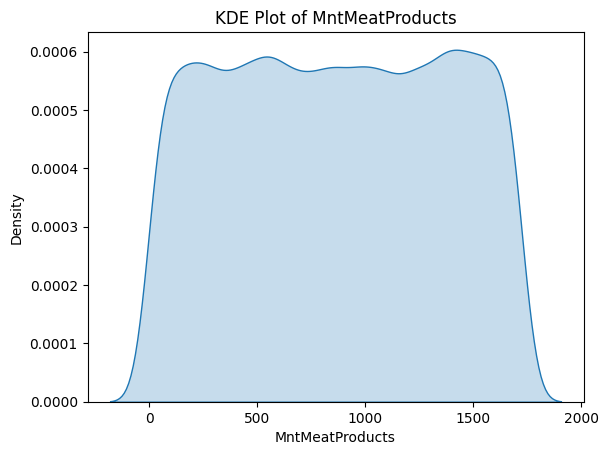

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


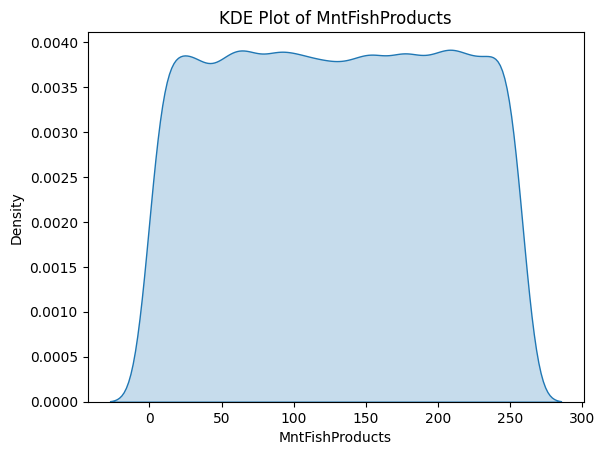

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


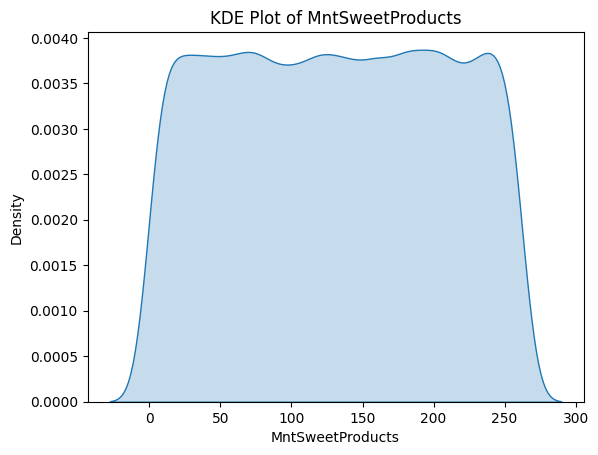

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


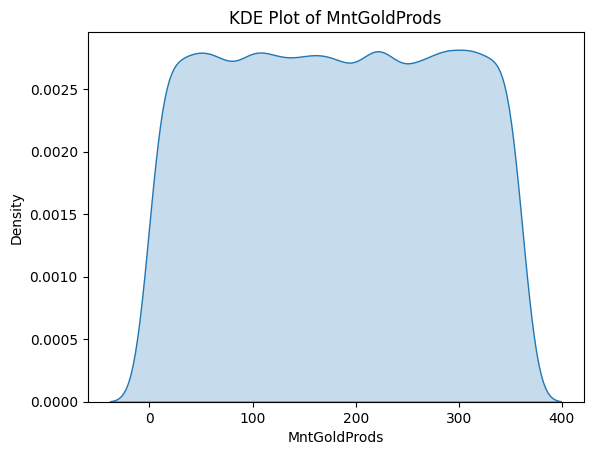

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


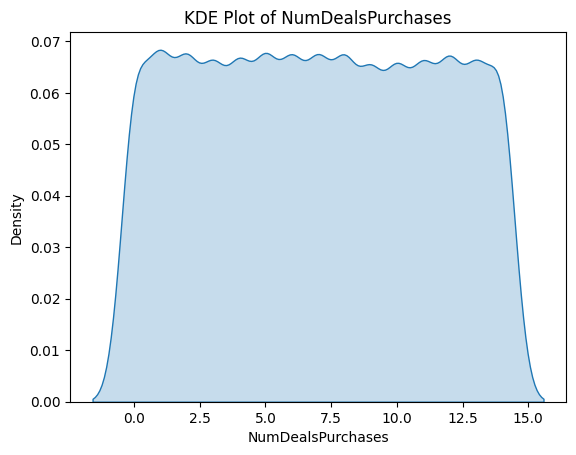

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


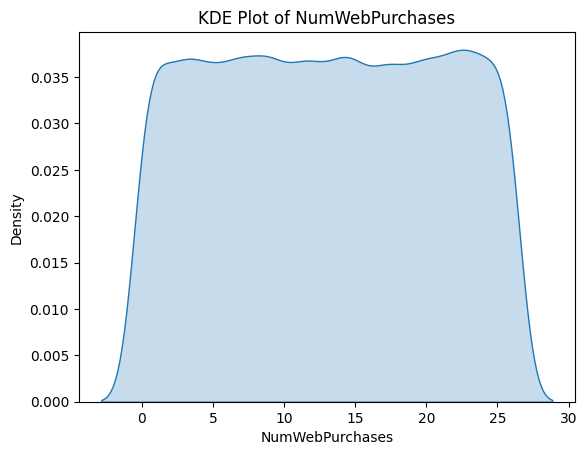

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


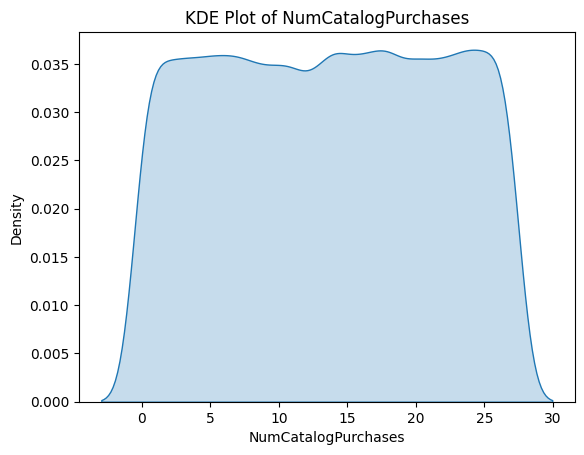

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


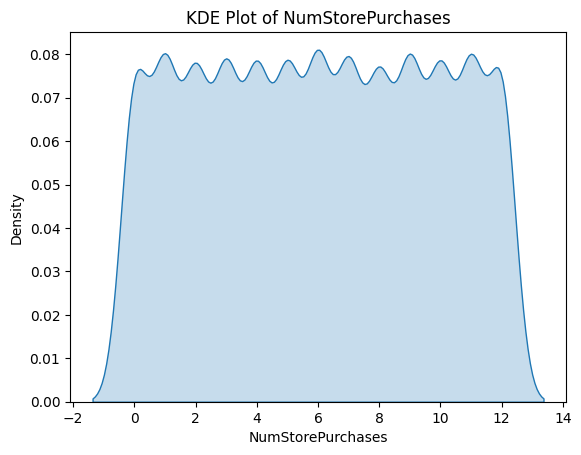

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


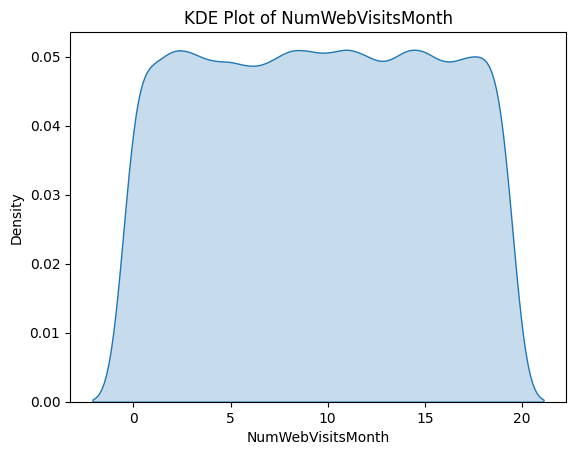

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


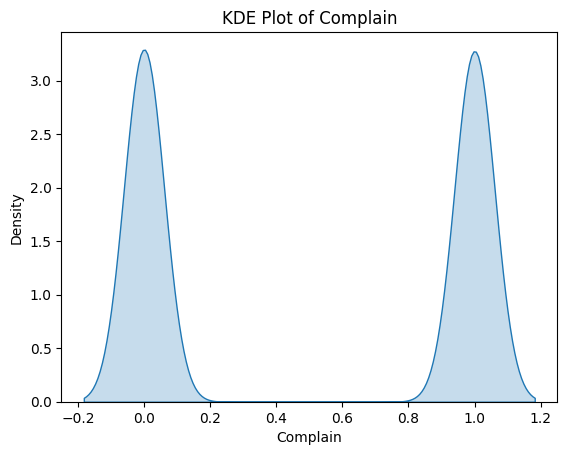

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


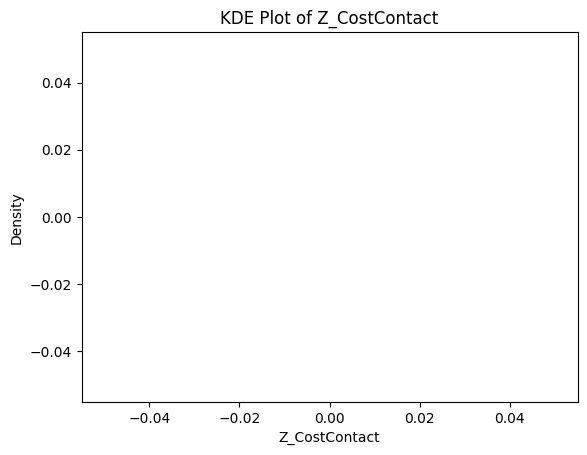

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


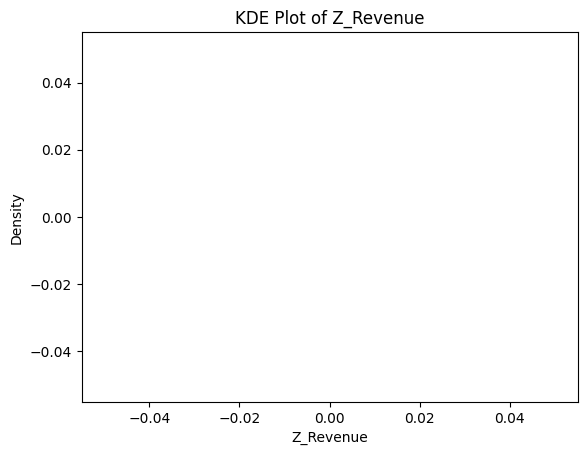

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


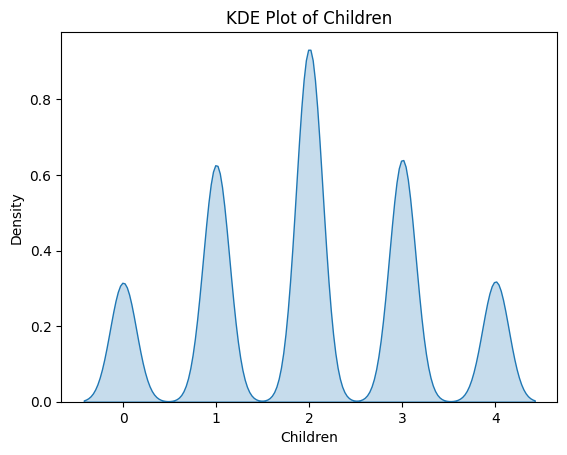

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


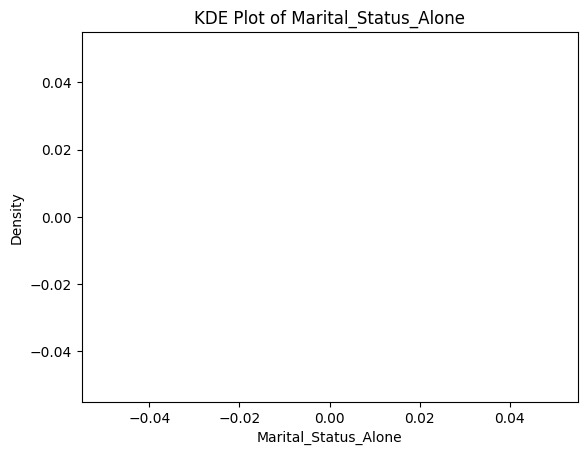

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


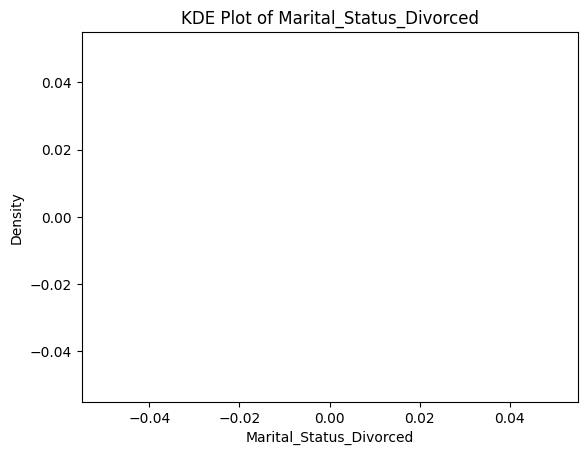

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


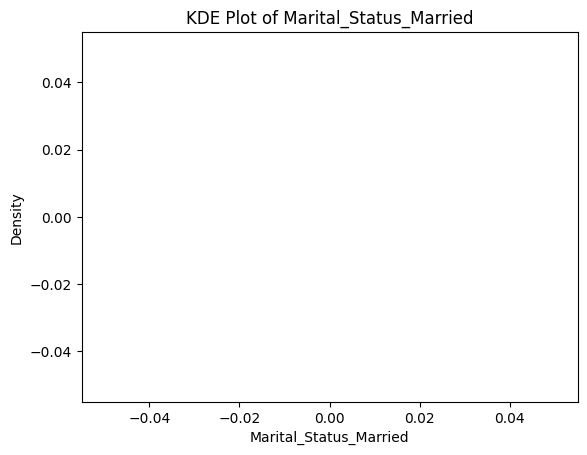

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


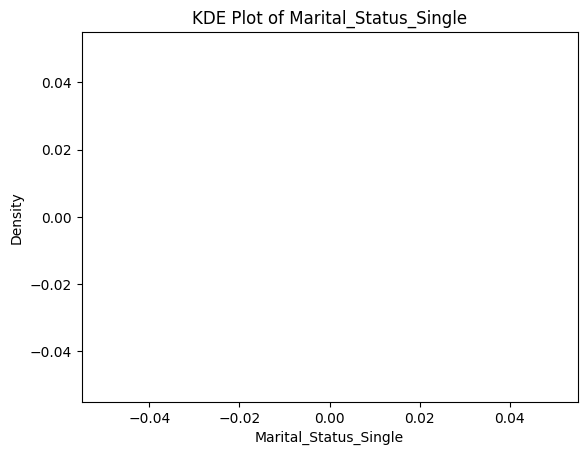

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


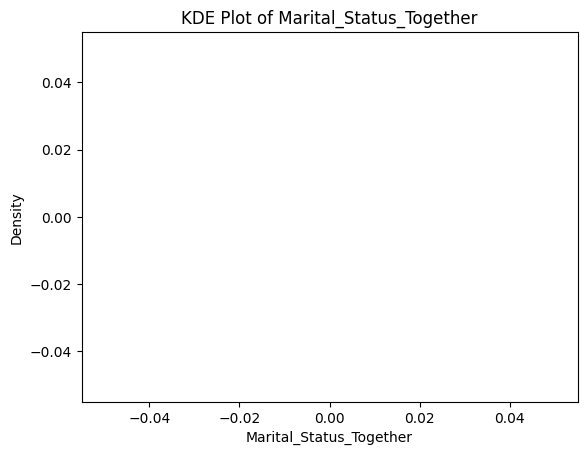

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


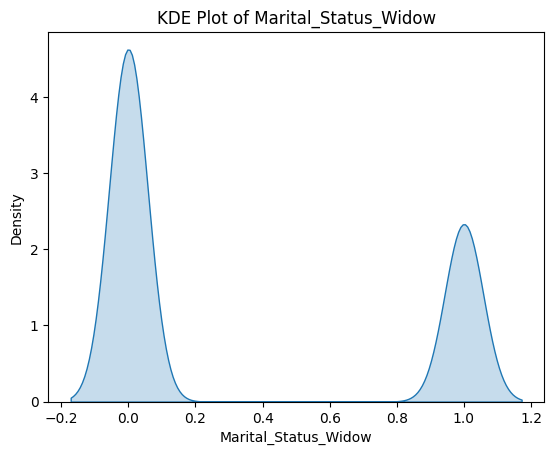

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


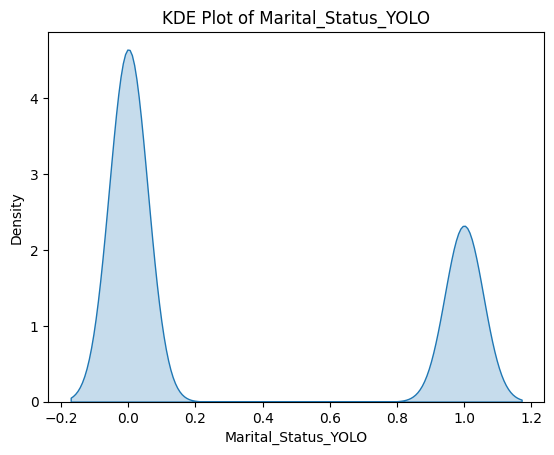

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_7284\4006450230.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


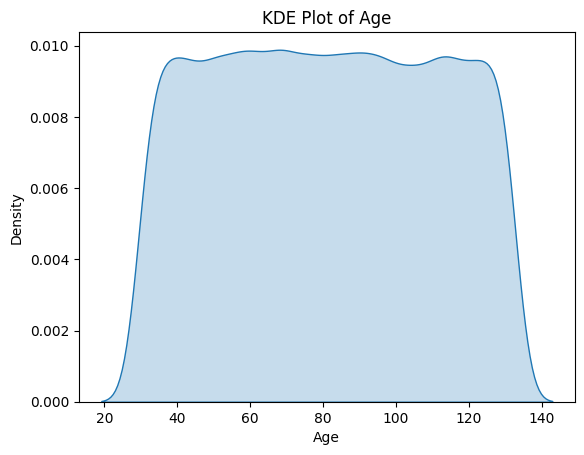

In [31]:
for col in num_cols:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'KDE Plot of {col}')
    plt.show()

In [32]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [33]:
print("Available Numerical Columns:", num_cols)

Available Numerical Columns: ['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Children', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Age']


In [34]:
valid_num_cols = [col for col in num_cols if col in data.columns]
print("Valid Numerical Columns for Nearest Neighbors:", valid_num_cols)

Valid Numerical Columns for Nearest Neighbors: ['ID', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Children', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Age']


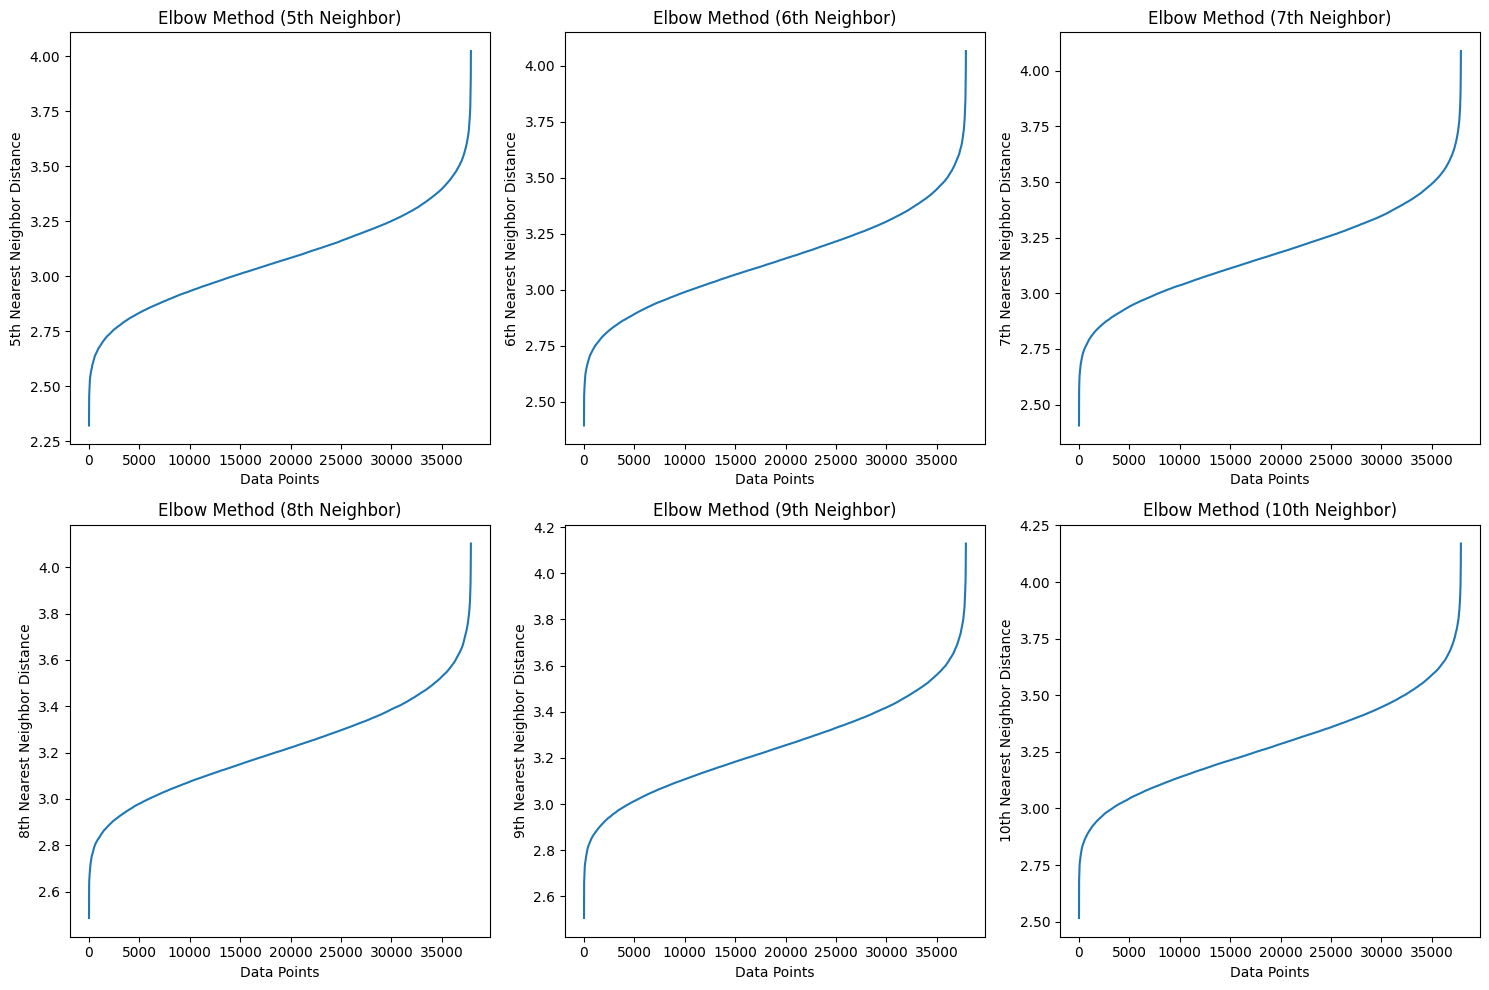

In [35]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10)  # Adjusted to a smaller n_neighbors for robustness
neighbors_fit = neighbors.fit(data[valid_num_cols])
distances, indices = neighbors_fit.kneighbors(data[valid_num_cols])

test = [5, 6, 7, 8, 9, 10]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, i in enumerate(test):
    row, col = divmod(idx, 3)
    sorted_distances = np.sort(distances[:, i-1], axis=0)
    axes[row, col].plot(sorted_distances)
    axes[row, col].set_xlabel("Data Points")
    axes[row, col].set_ylabel(f"{i}th Nearest Neighbor Distance")
    axes[row, col].set_title(f"Elbow Method ({i}th Neighbor)")

plt.tight_layout()
plt.show()

In [36]:
data.to_csv('cleaned_data.csv', index=False)